<a href="https://colab.research.google.com/github/BreyeFoka/notebooks-AI/blob/main/MNIST_Handwritten_Digits_modified.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN to classify handwritten digits
----

### Importing Tensorflow and MNIST Dataset

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

#Other Libraries
import numpy as np

#Plot Paramenters
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16,8)

##### Importing MNIST Dataset

In [ ]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

#Dataset size
print("Training Data Shape \t: X : ",X_train.shape, " y : ",y_train.shape)
print("Test Data Shape \t: X : ",X_test.shape, " y : ",y_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training Data Shape 	: X :  (60000, 28, 28)  y :  (60000,)
Test Data Shape 	: X :  (10000, 28, 28)  y :  (10000,)


Thus, we have total of 70,000 28X28 pixels images, of which 60,000 are in training set and rest 10,000 in test data set

### Preview Few Random Images
-------


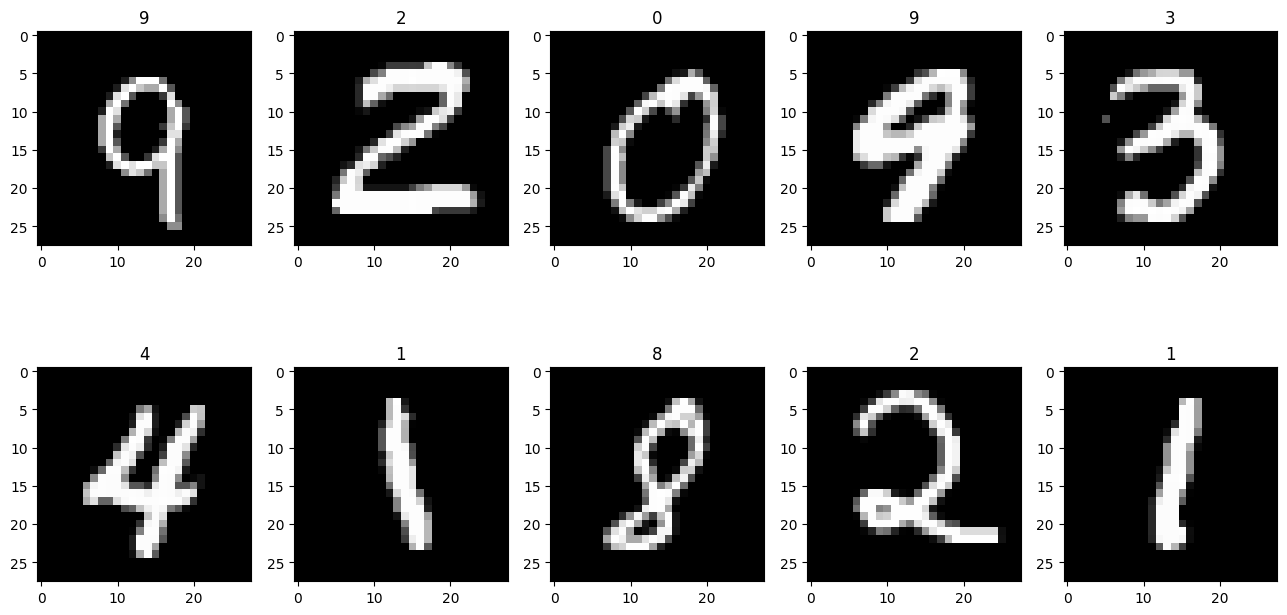

In [ ]:
rand_arr = np.random.randint(low=1,high=len(X_train),size=(10,))
for i in range(0,len(rand_arr)):
  plt.subplot(2,5,i+1)
  plt.imshow(X_train[rand_arr[i]],cmap=plt.get_cmap('gray'))
  plt.title(y_train[rand_arr[i]])

#### Preprocess Data

In [ ]:
#One-hot encode the y variable
y_train  = tf.one_hot(y_train,depth=10)
y_test = tf.one_hot(y_test,depth=10)

#Normalizing
X_train = X_train/255.0
X_test = X_test/255.0

# Creating a Shallow Neural Network Model

In [ ]:
shallow_model = tf.keras.models.Sequential()
shallow_model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
shallow_model.add(tf.keras.layers.Dense(128,activation='sigmoid',kernel_regularizer=tf.keras.regularizers.l2(0.001)))
shallow_model.add(tf.keras.layers.Dense(10,activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
#Compile the Model
shallow_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

%time history = shallow_model.fit(X_train,y_train,validation_split=0.166,epochs=30,batch_size=10)

Epoch 1/30
5004/5004 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.8409 - loss: 0.7588 - val_accuracy: 0.9208 - val_loss: 0.4042
Epoch 2/30
5004/5004 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9122 - loss: 0.4250 - val_accuracy: 0.9290 - val_loss: 0.3644
Epoch 3/30
5004/5004 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9235 - loss: 0.3802 - val_accuracy: 0.9372 - val_loss: 0.3417
Epoch 4/30
5004/5004 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9298 - loss: 0.3581 - val_accuracy: 0.9449 - val_loss: 0.3205
Epoch 5/30
5004/5004 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9353 - loss: 0.3382 - val_accuracy: 0.9444 - val_loss: 0.3097
Epoch 6/30
5004/5004 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9382 - loss: 0.3257 - val_accuracy: 0.9500 - val_loss: 0.2862
Epoch 7/30
5004/5004 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9434 - loss: 0.3097 - val_accuracy: 0.9519 - val_loss: 0.2910
Epoch 8/30
5004/5004 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9437 - loss: 0.

In [ ]:
score, acc = shallow_model.evaluate(X_test,y_test)
print('Test Score : ',score)
print('Test Accuracy : ',round((acc*100),2),"%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9569 - loss: 0.2363
Test Score :  0.21394500136375427
Test Accuracy :  96.11 %


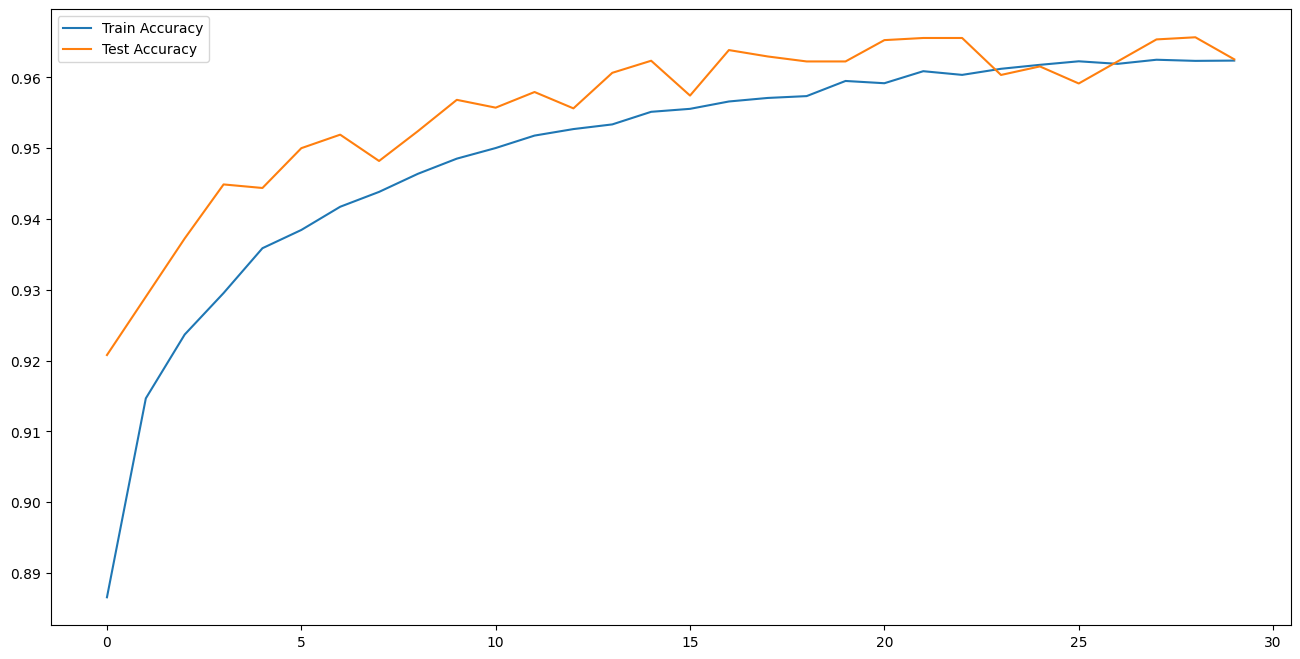

In [ ]:
plt.plot(history.history['accuracy'],label='Train Accuracy')
plt.plot(history.history['val_accuracy'],label='Test Accuracy')
plt.legend()

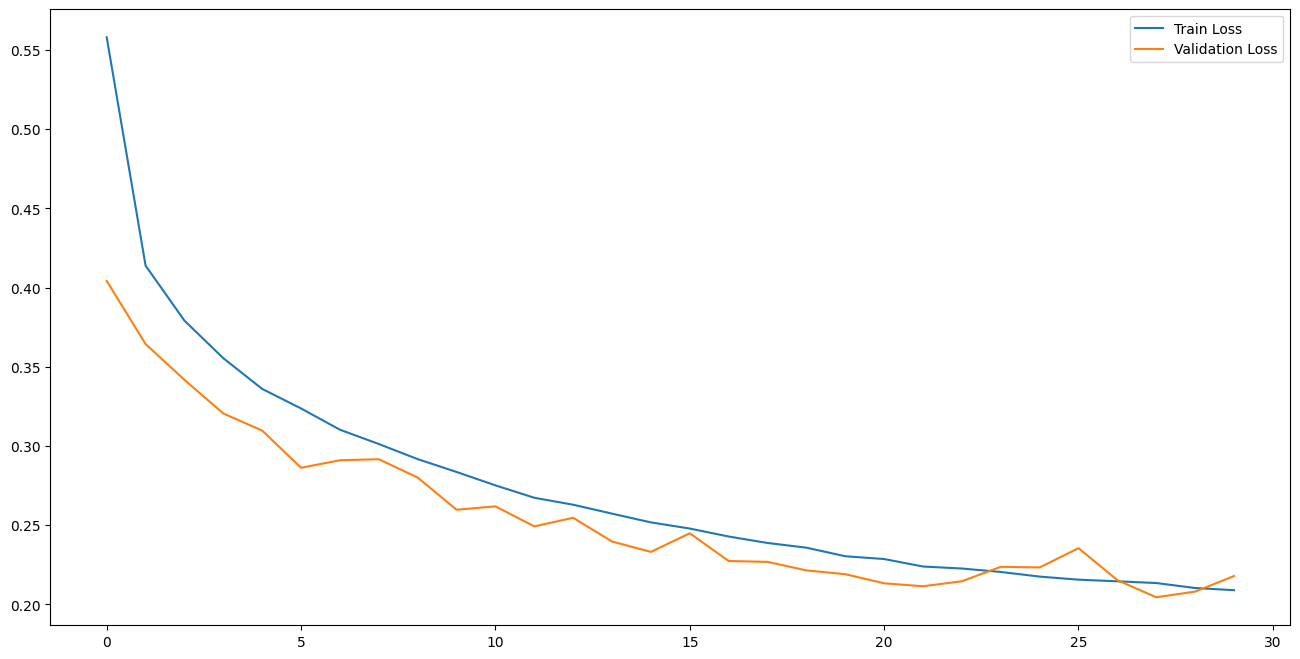

In [ ]:
plt.plot(history.history['loss'],label='Train Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.legend()

# Convolution Neural Network
-------

In [ ]:
trainx = X_train.reshape(X_train.shape[0],28,28,1)
testx = X_test.reshape(X_test.shape[0],28,28,1)

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(30,(5,5),activation='relu',input_shape=(28,28,1)))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(60,(5,5),activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(500,activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(1000,activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
%time history = model.fit(trainx,y_train,validation_split=0.166,epochs=20,batch_size=20)

Epoch 1/20
2502/2502 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.8858 - loss: 0.3508 - val_accuracy: 0.9848 - val_loss: 0.0506
Epoch 2/20
2502/2502 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9808 - loss: 0.0651 - val_accuracy: 0.9883 - val_loss: 0.0423
Epoch 3/20
2502/2502 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9863 - loss: 0.0505 - val_accuracy: 0.9893 - val_loss: 0.0429
Epoch 4/20
2502/2502 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9891 - loss: 0.0412 - val_accuracy: 0.9905 - val_loss: 0.0418
Epoch 5/20
2502/2502 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9904 - loss: 0.0387 - val_accuracy: 0.9885 - val_loss: 0.0539
Epoch 6/20
2502/2502 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9910 - loss: 0.0336 - val_accuracy: 0.9867 - val_loss: 0.0559
Epoch 7/20
2502/2502 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9926 - loss: 0.0272 - val_accuracy: 0.9904 - val_loss: 0.0507
Epoch 8/20
2502/2502 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9916 - loss: 0.0308

In [ ]:
score, acc = model.evaluate(testx,y_test)
print('Test Score : ',score)
print('Test Accuracy : ',round((acc*100),2),"%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9885 - loss: 0.0694
Test Score :  0.05540425330400467
Test Accuracy :  99.11 %


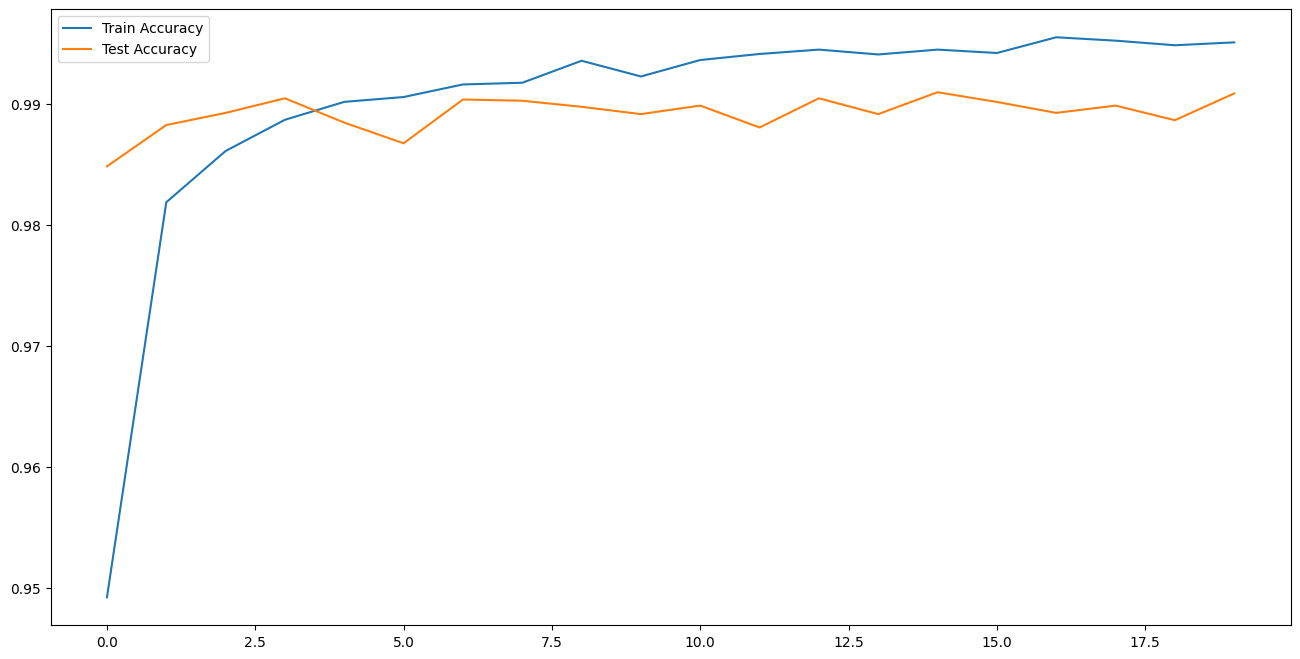

In [ ]:
plt.plot(history.history['accuracy'],label='Train Accuracy')
plt.plot(history.history['val_accuracy'],label='Test Accuracy')
plt.legend()

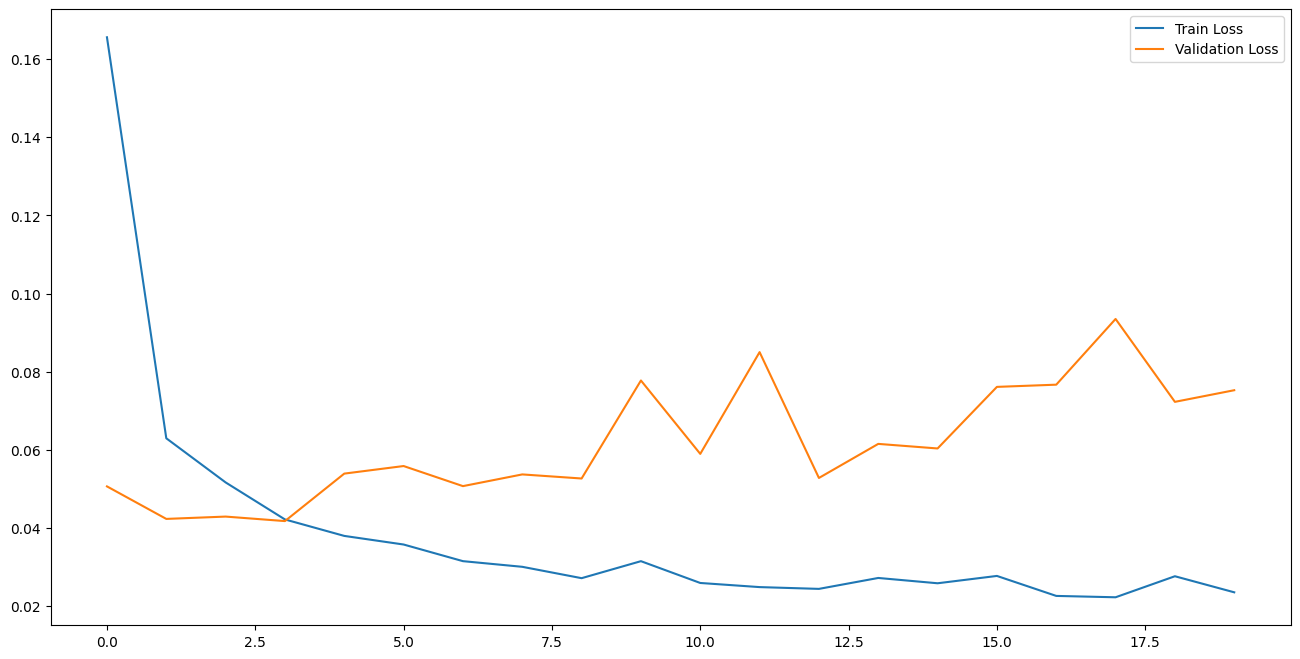

In [ ]:
plt.plot(history.history['loss'],label='Train Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.legend()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


ValueError: Exception encountered when calling Sequential.call().

[1mCannot take the length of shape with unknown rank.[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=<unknown>, dtype=float32)
  • training=False
  • mask=None

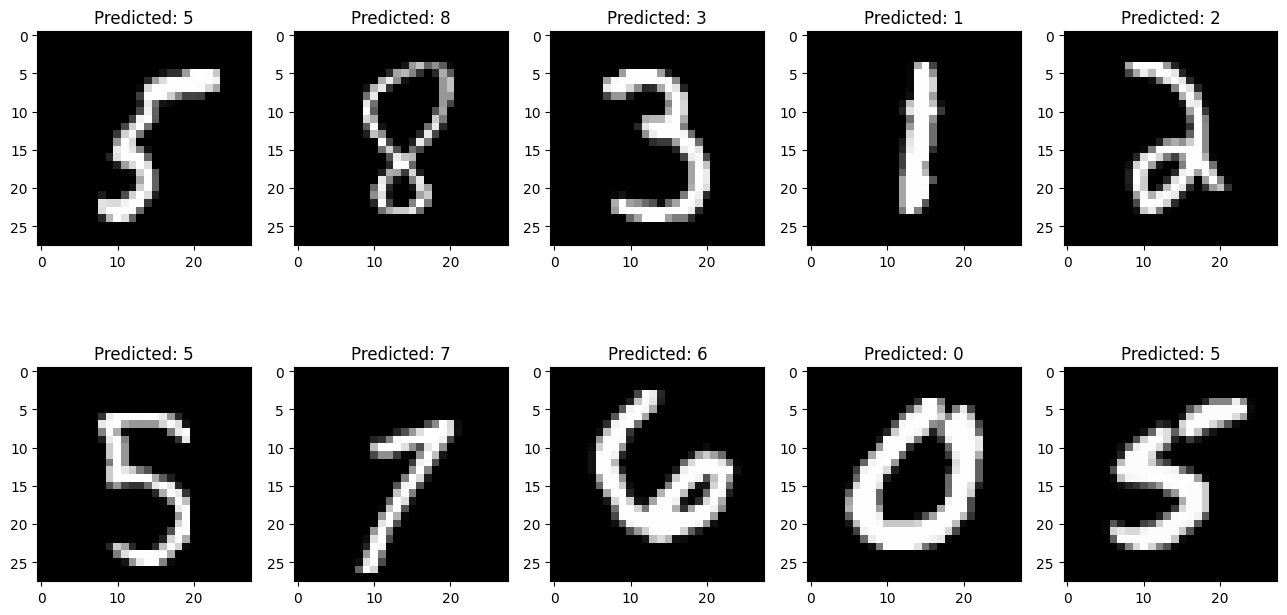

In [ ]:
# prompt: make the model predict a random number inside the dataset

import random

# Assuming 'X_test' and 'y_test' are defined from the provided code.


prediction_images=[]
prediction_titles=[]
predicted=[]
for i in range(10):
  random_index=random.randint(0, len(X_test)-1)
  random_image=X_test[random_index]
  random_label=y_test[random_index]
  prediction_images.append(random_image)
  prediction_titles.append(np.argmax(random_label))


# Use your model to predict

for prediction in prediction_images:
  prediction = prediction.reshape(1, 28, 28, 1)

for i in range(10):
  prediction = model.predict(prediction_images[i].reshape(1, 28, 28, 1))
  predicted.append(np.argmax(prediction))

for i in range(10):
  plt.subplot(2,5,1+i)
  plt.imshow(prediction_images[i].reshape(28, 28), cmap='gray')
  plt.title(f"Predicted: "+str(predicted[i]))


prediction = model.predict(random_image)
predicted_label = np.argmax(prediction)

print("Randomly selected image's true label:", np.argmax(random_label))
print("Predicted label:", predicted_label)